# Evaluation of WBGAPI - Python client for World Bank Open Data API

In [1]:
import wbgapi as wb
import pandas as pd

__Phase Two__ - acquiring programmatic access to underlying data stored on World Bank databases. For the currently active database, the WBGAPI data sub-package requests data for combinations of series, economies, and time periods. 

### _Extract information pertaining to selected indicators stored in WDI database_

In [2]:
wb.db=2
df_info = pd.DataFrame( wb.series.info([ 'NY.GDP.PCAP.CD', 'NY.ADJ.NNTY.PC.CD' ] ).items )
df_info

,id,value
0,NY.ADJ.NNTY.PC.CD,Adjusted net national income per capita (curre...
1,NY.GDP.PCAP.CD,GDP per capita (current US$)


### _Retrieve North American GDP and National Wage indicator values covering 2010 - 2020_

In [3]:
# retrieve North American country GDP + population totals for most recent 5 years 
df = wb.data.DataFrame(['NY.GDP.PCAP.CD', 'NY.ADJ.NNTY.PC.CD'], [ 'CAN', 'USA', 'MEX' ], range(2010, 2020) )
df

YR2010        YR2011        YR2012  \
economy series                                                        
CAN     NY.ADJ.NNTY.PC.CD  38702.434471  42587.828267  42991.135992   
        NY.GDP.PCAP.CD     47562.083425  52223.696112  52669.089963   
MEX     NY.ADJ.NNTY.PC.CD   7342.672512   7898.582819   7898.576467   
        NY.GDP.PCAP.CD      9271.398396  10203.421295  10241.727828   
USA     NY.ADJ.NNTY.PC.CD  40995.935392  42619.071147  44727.359175   
        NY.GDP.PCAP.CD     48466.657603  49882.558132  51602.931046   

                                 YR2013        YR2014        YR2015  \
economy series                                                        
CAN     NY.ADJ.NNTY.PC.CD  43034.904125  41604.745493  35337.877853   
        NY.GDP.PCAP.CD     52635.174958  50955.998323  43596.135537   
MEX     NY.ADJ.NNTY.PC.CD   8251.412710   8568.524935   7638.865091   
        NY.GDP.PCAP.CD     10725.183587  10928.916009   9616.645558   
USA     NY.ADJ.NNTY.PC.CD  45665.506826  47701.374228  49219.527850   
        NY.GDP.PCAP.CD     53106.536767  55049.988327  56863.371496   

                                 YR2016        YR2017        YR2018  \
economy series                                                        
CAN     NY.ADJ.NNTY.PC.CD  34316.451446  36962.090554  37739.019684   
        NY.GDP.PCAP.CD     42315.603706  45129.356440  46454.743395   
MEX     NY.ADJ.NNTY.PC.CD   6905.108879   7283.861548   7520.703970   
        NY.GDP.PCAP.CD      8744.515559   9287.849587   9686.984927   
USA     NY.ADJ.NNTY.PC.CD  49653.910269  51313.855531  53540.350803   
        NY.GDP.PCAP.CD     58021.400500  60109.655726  63064.418410   

                                 YR2019  
economy series                           
CAN     NY.ADJ.NNTY.PC.CD  37829.482735  
        NY.GDP.PCAP.CD     46326.672638  
MEX     NY.ADJ.NNTY.PC.CD   7749.904979  
        NY.GDP.PCAP.CD      9950.450080  
USA     NY.ADJ.NNTY.PC.CD  55419.386415  
        NY.GDP.PCAP.CD     65279.529026

In [4]:
df = df.swaplevel()
df

,,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
series,economy,,,,,,,,,,
NY.ADJ.NNTY.PC.CD,CAN,38702.434471,42587.828267,42991.135992,43034.904125,41604.745493,35337.877853,34316.451446,36962.090554,37739.019684,37829.482735
NY.GDP.PCAP.CD,CAN,47562.083425,52223.696112,52669.089963,52635.174958,50955.998323,43596.135537,42315.603706,45129.356440,46454.743395,46326.672638
NY.ADJ.NNTY.PC.CD,MEX,7342.672512,7898.582819,7898.576467,8251.412710,8568.524935,7638.865091,6905.108879,7283.861548,7520.703970,7749.904979
NY.GDP.PCAP.CD,MEX,9271.398396,10203.421295,10241.727828,10725.183587,10928.916009,9616.645558,8744.515559,9287.849587,9686.984927,9950.450080
NY.ADJ.NNTY.PC.CD,USA,40995.935392,42619.071147,44727.359175,45665.506826,47701.374228,49219.527850,49653.910269,51313.855531,53540.350803,55419.386415
NY.GDP.PCAP.CD,USA,48466.657603,49882.558132,51602.931046,53106.536767,55049.988327,56863.371496,58021.400500,60109.655726,63064.418410,65279.529026


### _Generate time series visualisations of GDP per capita for North America_

<AxesSubplot:title={'center':'GDP per capita (current US$)'}, xlabel='economy'>

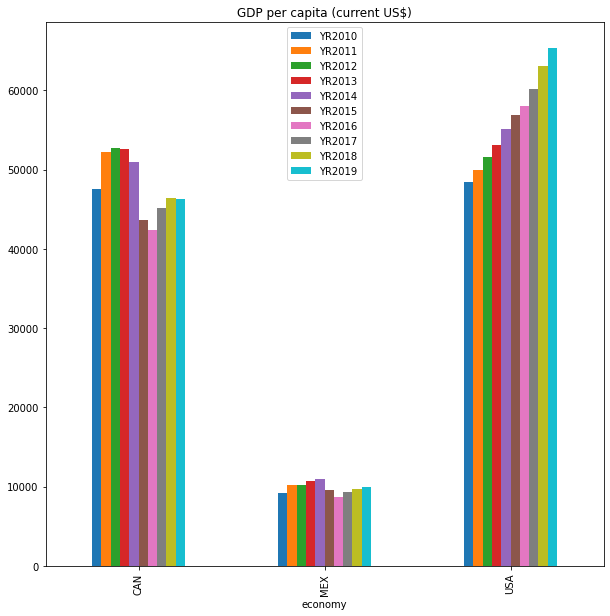

In [13]:
title = df_info [ df_info[ 'id' ] == 'NY.GDP.PCAP.CD' ][ 'value' ].values[ 0 ]
df.loc[ 'NY.GDP.PCAP.CD' ].plot.bar( title=title, figsize=(10,10) )

<AxesSubplot:title={'center':'GDP per capita (current US$) Time Series'}>

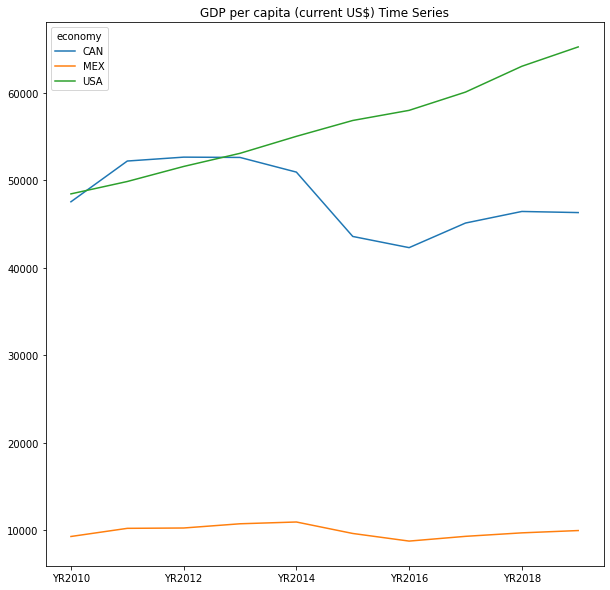

In [14]:
# transpose to display gdp vs year
title = df_info [ df_info[ 'id' ] == 'NY.GDP.PCAP.CD' ][ 'value' ].values[ 0 ]
df.loc[ 'NY.GDP.PCAP.CD' ].transpose().plot( figsize=(10,10), title=title + ' Time Series' )

### _Generate time series visualisation of National Income per capita for North America_

<AxesSubplot:title={'center':'Adjusted net national income per capita (current US$) Time Series'}>

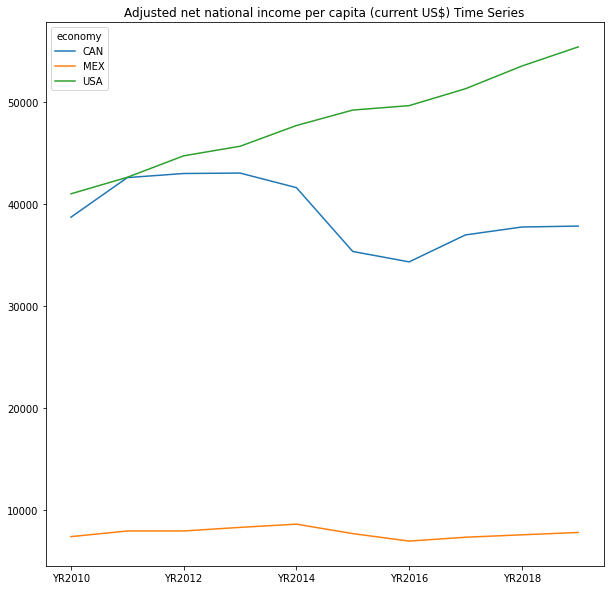

In [16]:
# transpose to display gdp vs year
title = df_info [ df_info[ 'id' ] == 'NY.ADJ.NNTY.PC.CD' ][ 'value' ].values[ 0 ]
df.loc[ 'NY.ADJ.NNTY.PC.CD' ].transpose().plot( figsize=(10,10), title=title + ' Time Series' )

### _Generate visualisation of GDP vs National Income for United States and Canada_

In [36]:
df = wb.data.DataFrame(['NY.GDP.PCAP.CD', 'NY.ADJ.NNTY.PC.CD'], [ 'CAN', 'USA', 'MEX' ], range(2010, 2020), columns='series' )
df

NY.ADJ.NNTY.PC.CD  NY.GDP.PCAP.CD
economy time                                     
CAN     YR2010       38702.434471    47562.083425
        YR2011       42587.828267    52223.696112
        YR2012       42991.135992    52669.089963
        YR2013       43034.904125    52635.174958
        YR2014       41604.745493    50955.998323
        YR2015       35337.877853    43596.135537
        YR2016       34316.451446    42315.603706
        YR2017       36962.090554    45129.356440
        YR2018       37739.019684    46454.743395
        YR2019       37829.482735    46326.672638
MEX     YR2010        7342.672512     9271.398396
        YR2011        7898.582819    10203.421295
        YR2012        7898.576467    10241.727828
        YR2013        8251.412710    10725.183587
        YR2014        8568.524935    10928.916009
        YR2015        7638.865091     9616.645558
        YR2016        6905.108879     8744.515559
        YR2017        7283.861548     9287.849587
        YR2018        7520.703970     9686.984927
        YR2019        7749.904979     9950.450080
USA     YR2010       40995.935392    48466.657603
        YR2011       42619.071147    49882.558132
        YR2012       44727.359175    51602.931046
        YR2013       45665.506826    53106.536767
        YR2014       47701.374228    55049.988327
        YR2015       49219.527850    56863.371496
        YR2016       49653.910269    58021.400500
        YR2017       51313.855531    60109.655726
        YR2018       53540.350803    63064.418410
        YR2019       55419.386415    65279.529026

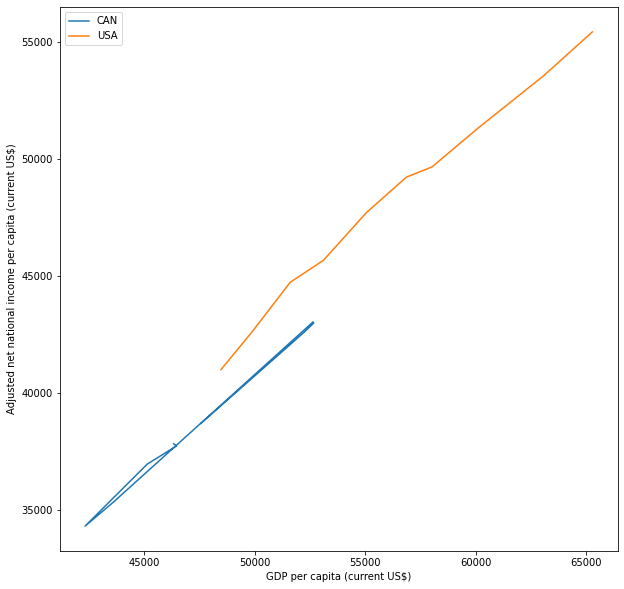

In [37]:
# plot gdp vs national income
ax = df.loc[ 'CAN' ].plot( figsize=(10,10), x='NY.GDP.PCAP.CD', y='NY.ADJ.NNTY.PC.CD' )
df.loc[ 'USA' ].plot( ax=ax, figsize=(10,10), x='NY.GDP.PCAP.CD', y='NY.ADJ.NNTY.PC.CD' )

ax.set_xlabel( df_info [ df_info[ 'id' ] == 'NY.GDP.PCAP.CD' ][ 'value' ].values[ 0 ] )
ax.set_ylabel( df_info [ df_info[ 'id' ] == 'NY.ADJ.NNTY.PC.CD' ][ 'value' ].values[ 0 ] )
ax.legend( [ 'CAN', 'USA' ] )